## 2.Data Analysis

The second phase of the Titanic Project is the Data analysis. On this stage the tasks to be accoplished is: download the data from the source, a description of the fields on the data, exploratory analysis and quality checkup. The objective of the phase is , with the main objective proposed on the first stage, identify, collect and analise what has to be made on the data to obtain a satisfactory result at the end.  

### A) Download the data

The data is located at the kaggle website:https://www.kaggle.com/competitions/titanic/data. Next, we will download the data into the data directory.

In [3]:
!kaggle competitions download -c titanic -p ../data/

  0%|                                               | 0.00/34.1k [00:00<?, ?B/s]
100%|███████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 414kB/s]


Unpacking the files.

In [4]:
! unzip ../data/titanic.zip -d ../data/

Archive:  ../data/titanic.zip
  inflating: ../data/gender_submission.csv  
  inflating: ../data/test.csv        
  inflating: ../data/train.csv       


Now we can proceed loading the data.

### B) Describe the data

The data is on a CSV format and subdivided into 3 files. In this section we will load and describe the data using the pandas library.

In [1]:
import pandas as pd
#loading the data
gender_submission = pd.read_csv("../data/gender_submission.csv")
test_ds = pd.read_csv("../data/test.csv")
train_ds = pd.read_csv("../data/train.csv")

In [2]:
train_ds[train_ds['Age']<2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S


On the website of the competition, they informed that the gender_submission is an example of the format we have to copie for the submission. Also, they don't makes available the ground_truth of the test file, only for the training. 

Let's take a look on the train data.

In [3]:
train_ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can observe that the dataset train has seven columns with numeric types(int, float...): PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare. By the row count, we can see that the age is the only columns that has missing values. Important to notice that maybe the others columns may have missing values or other problems, the next seccion we will take a look. The column names give us a hint on what the columns have but we must proceed to certify.

In [4]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The info method brings the complete columns with the types. We have columns with the type object, this is a problem for the model and we need to transform or remove the columns. Next, the head method will give us examples of the values on the columns.

In [5]:
train_ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The name column will not help on the prediction of survived, it's not a tottaly uselles column because if some sex is missing we can try to estimate by the name. The ticket column maybe is useful to estimate the fare that the passenger payed, but for survived prediction maybe we can remove. The Cabin has missing values to, the info method already pointed this information. A important information that the head brings to us is that  the object types pointed out on the last method, dosn't have complex strings which would require language models to extract the information. We can remove just remove the name column and work the others type with some categorical transformation, maybe one hot encoding. Moreover, we have some categorical variables described by ints, i.e, SibSp and Parch.

Next, let's make a summary about what each column brings as information:

1. PassengerId(int64): Unique passenger identity.
2. *Target* Survived(int64): This is the class we are trying to predict. This column, assumes either 0 representing not survive or 1 representing survived.
3. Pclass(int64): The class of the ticket. Assumes three discrete values: 1 for 1st, 2 for 2nd, 4 for 3rd.
4. Name(object: String): The name of the passenger.
5. Sex(object: String): The binary sex of the passenger, assuming two values male or female.
6. Age(float64): The age of the passenger.
7. SibSp(int64): Number of siblings/spouses abourd the Titanic.
8. Parch(int64): Number of parents/children abourd the Titanic.
9. Ticket(int64): Ticket number.
10. Fare(float64): Passenger fare.
11. Cabin(object: String): Cabin number.
12. Embarked(object: String): Port of Embarkation. Assumes three discrete values: C for Cherbourg, Q for Queenstown, S for Southampton.

Let's make the same for the other two tables.

In [6]:
test_ds.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [8]:
test_ds.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Remember, the gender submission is the format for sending the submission.

In [9]:
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [10]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In this section, we explicit some measures that has to be made before the modeling stage. The changes suggested is the following:

1. Remove the PassengerId: This column will not help to predict the survivors and can confuse the model.
2. Remove the Name: The name don't bring information about the survivors.
3. Transform categorical values: The columns Pclass, Sex, Embarked needs to be transformed. 
4. Missing values: Three columns needs some tratment for the missing values. The columns is Age, Cabin, Embarked.
5. Transform age in a range: The age can be more significative if transformed in ranges of ages. After transforming the age in discrete ranges, will also needs to transform like the categorical ones.
6. Transform the fare in a range: The fare also has potential to the transformation cited on 5.

### C) Exploratory Analysis

In this section we will proceed analyzing with the help of graphs. The analyzis will also be focused on the influence of one variable in respect of others but let's begin with simple plots. The first plots reveal the distribution of columns alone.

In [11]:
train_ds.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

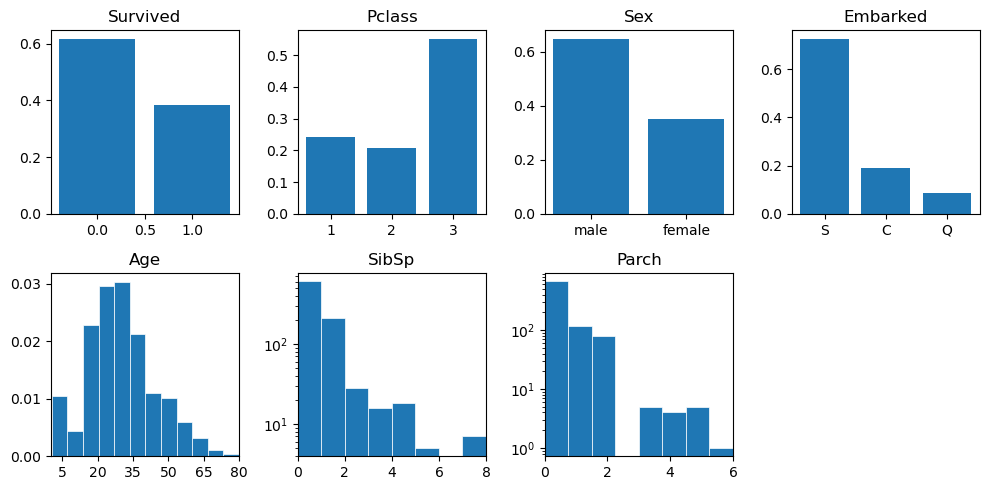

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 4, figsize=(10, 5))
#survived plot
survived = train_ds['Survived'].value_counts(normalize=True)
axs[0][0].set_title("Survived")
axs[0][0].bar(survived.index, survived)

#pclass plot
pclass = train_ds['Pclass'].value_counts(normalize=True)
axs[0][1].set_title("Pclass")
axs[0][1].bar(pclass.index, pclass)

#sex
sex = train_ds['Sex'].value_counts(normalize=True)
axs[0][2].set_title('Sex')
axs[0][2].bar(sex.index, sex)

#sex
embarked = train_ds['Embarked'].value_counts(normalize=True)
axs[0][3].set_title('Embarked')
axs[0][3].bar(embarked.index, embarked)
#train_ds['Embarked'].value_counts(normalize=True).plot(kind='bar')

#age
age = train_ds['Age']
axs[1][0].set_title('Age')
axs[1][0].hist(age, bins=12, linewidth=0.5, edgecolor="white", density =True)
axs[1][0].set(xlim=(0, max(age)), xticks=np.linspace(5, max(age), 6))

#sibsp
SibSp = train_ds['SibSp']
axs[1][1].set_title('SibSp')
axs[1][1].hist(SibSp, bins=8, linewidth=0.5, edgecolor="white", log= True)
axs[1][1].set(xlim=(0, max(SibSp)), xticks=np.linspace(0, max(SibSp), 5))

#parch
parch = train_ds['Parch']
axs[1][2].set_title('Parch')
axs[1][2].hist(parch, bins=8, linewidth=0.5, edgecolor="white", log= True)
axs[1][2].set(xlim=(0, max(parch)), xticks=np.linspace(0, max(parch), 4))

#remove last plot
axs[1][3].remove()

fig.tight_layout()
plt.show()

The training data-set is imbalanced in favour of 0, which means not survived. The data has other imbalances but the most important is the imbalance on the target. Maybe this imbalance dosn't change to much the perfomance results and doesn't require any change, we can also test oversample techniques to correct the gap.

Next, let's look at the data in pairs. The main focus is trying to identify some patterns to distinguish the group that survived from the group that did not.

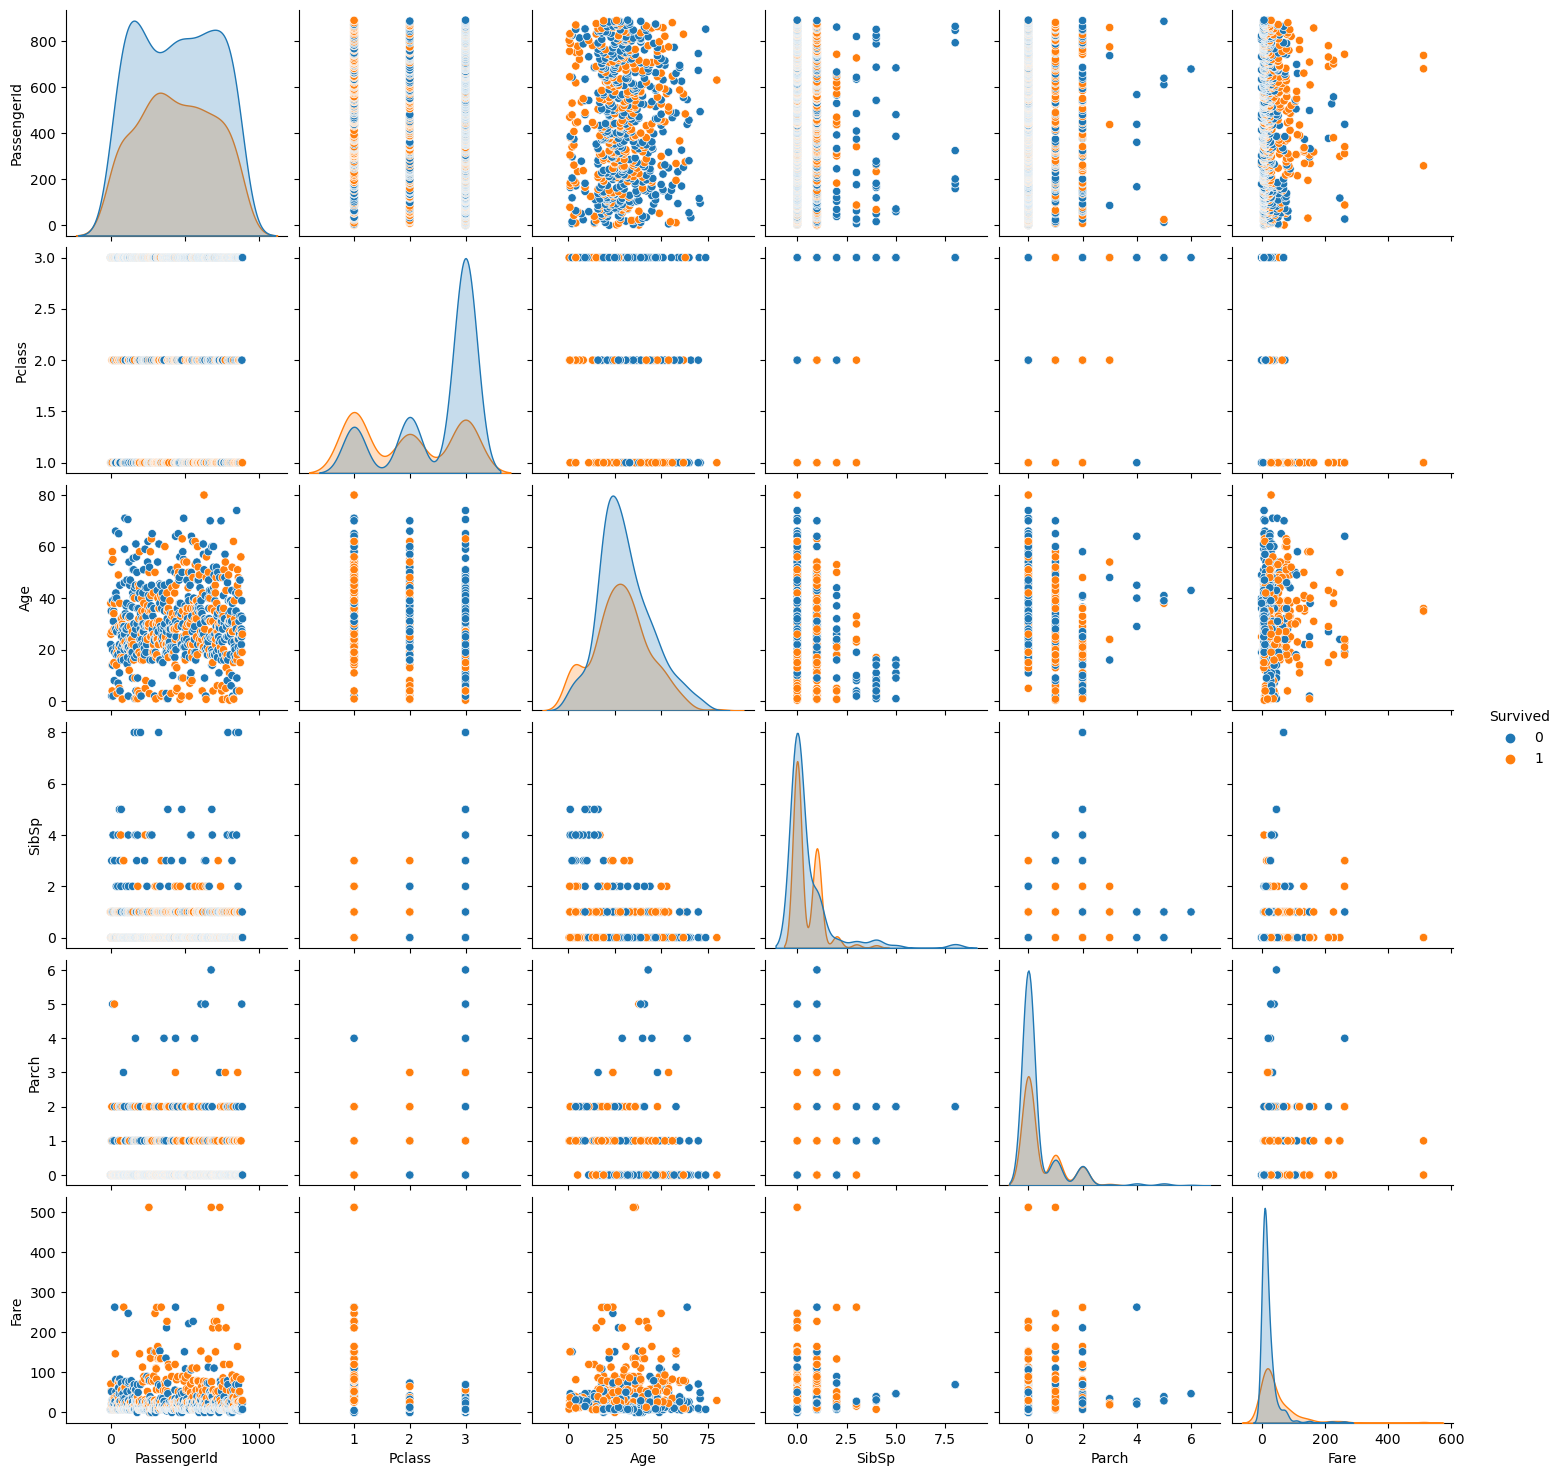

In [13]:
import seaborn as sns
sns.pairplot(train_ds, hue='Survived')

sns.pairplot(train_ds, hue='Survived')Beggining on the first row, the last column(Fare) shows that the price payed can possible be a good feature. When the fare grows, the plot becomes more orange. 
The second row is the pclass, intuitively the fare and pclass has some colinearity, but for some reason they are not as much colinear that expected. We can see from the second column, when the pclass ecounters the row pclass that the survivos dons't change in the same way that the fare does. The fare posses greater purity than the first class when the fare increases (last column and last row). When the pclass encounters the pclass, we can see the first class is more likely to survive, put is not as pure as the fare. 

The third row is the age. The children posses a survivor more than the adult. The famous phrase from the movies "Save the females and the childrens first." is true after all. The class is not imbalanced with respect to the age. 

The forth and fifth is Parch and SibSp. The extremities present parts separable for some reason. 

The last row is the fare and presents a higher probability of survive as the fare increase as already explained.

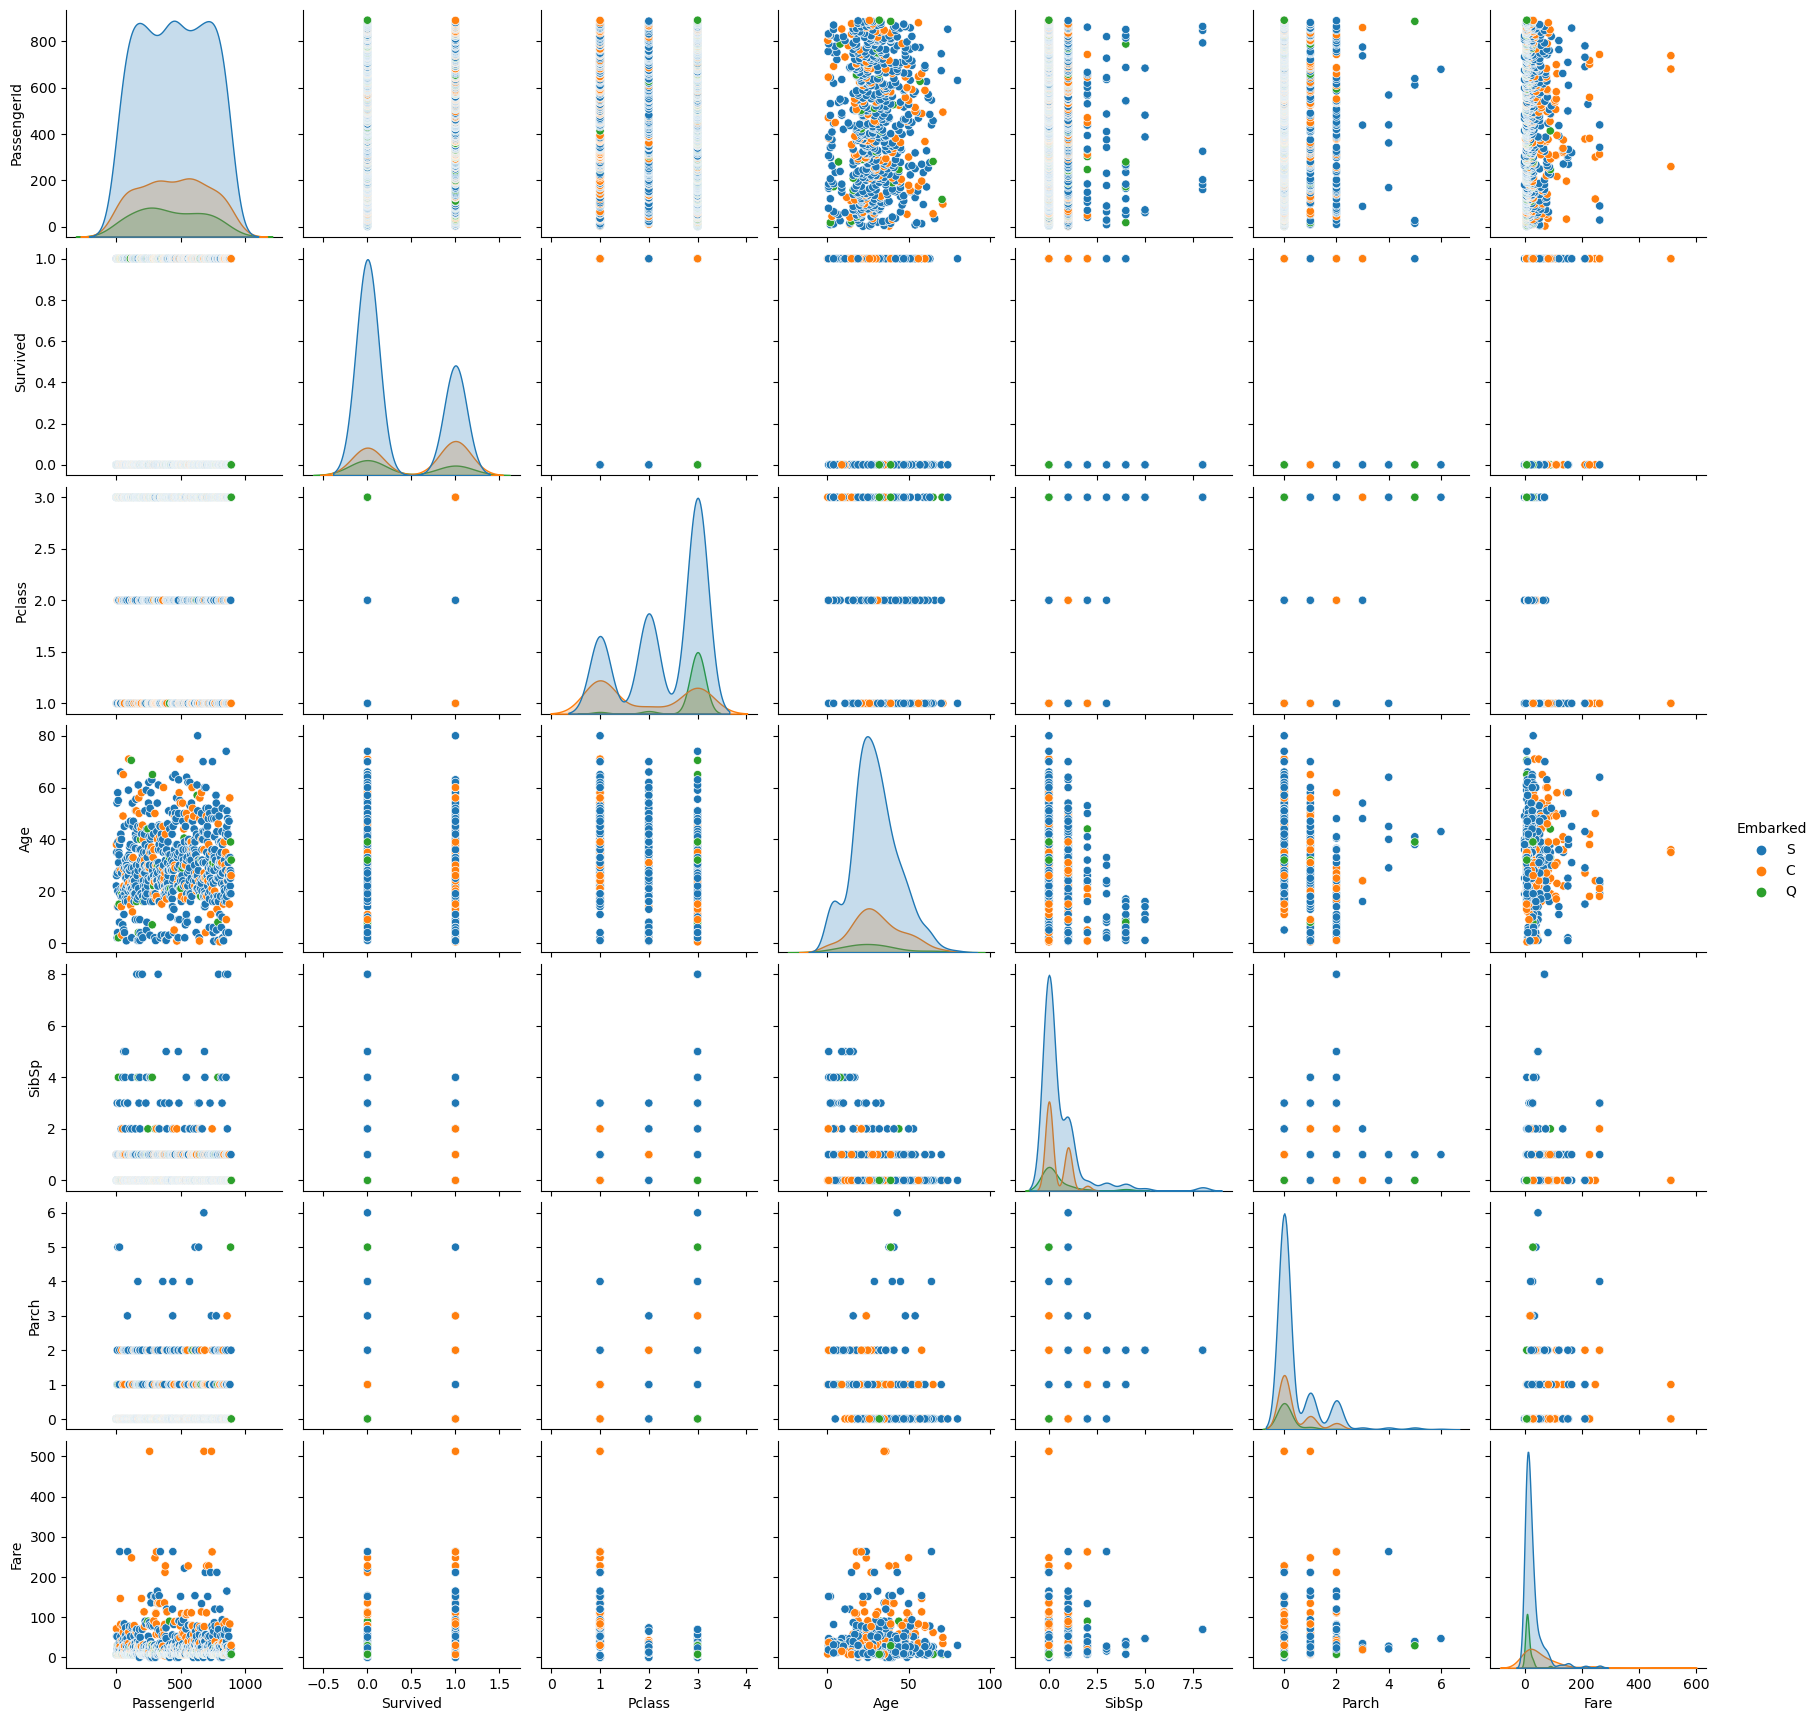

In [14]:
sns.pairplot(train_ds, hue='Embarked')

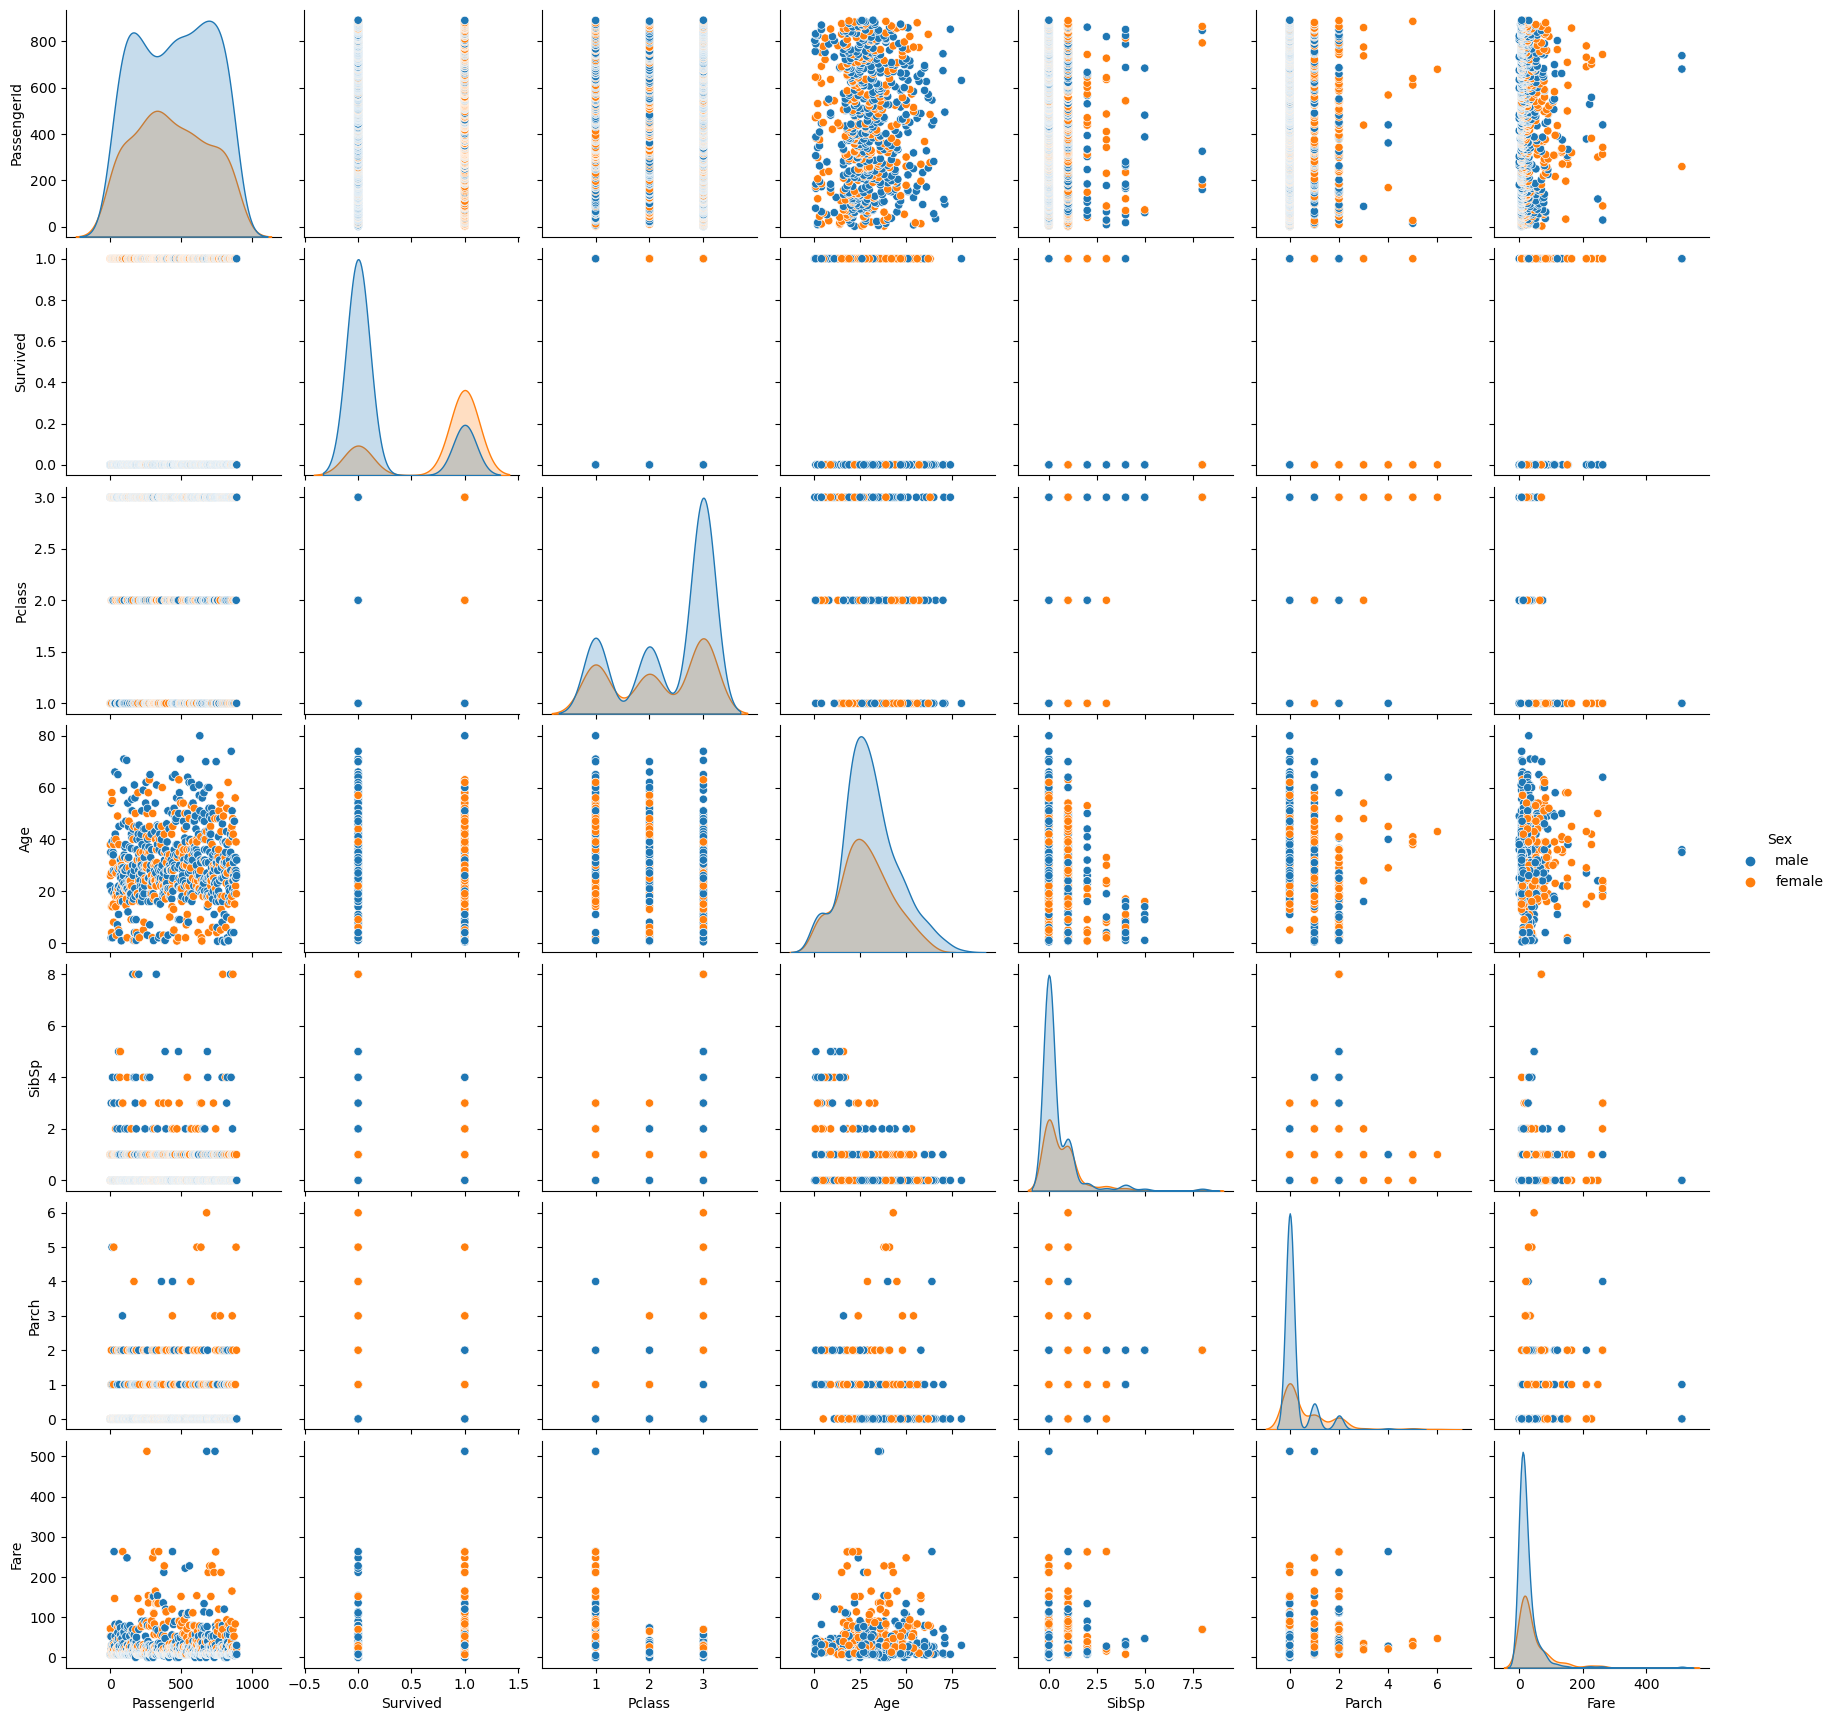

In [15]:
sns.pairplot(train_ds, hue='Sex')

### D) Summary

The description of the data pointed the following procedures:

1. Remove the PassengerId: This column will not help to predict the survivors and can confuse the model.
2. Remove the Name: The name don't bring information about the survivors.
3. Transform categorical values: The columns Pclass, Sex, Embarked needs to be transformed. 
4. Missing values: Three columns needs some tratment for the missing values. The columns is Age, Cabin, Embarked.
5. Transform age in a range: The age can be more significative if transformed in ranges of ages. After transforming the age in discrete ranges, will also needs to transform like the categorical ones.
6. Transform the fare in a range: The fare also has potential to the transformation cited on 5.

Moreover, the exploratory analysis shows imbalances but nothing critical. Oversampling has some pontential on the data set and overall the features has potential to classify the survivors due to some aspects on the extremities on the pairwise comparative.